In [40]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [41]:
!ls "/content/drive/MyDrive/data/"

t10k-images-idx3-ubyte.gz  train-images-idx3-ubyte.gz
t10k-labels-idx1-ubyte.gz  train-labels-idx1-ubyte.gz


In [42]:
import matplotlib.pyplot as plt
import numpy as np
import gzip
import seaborn as sns
import matplotlib.pyplot as plt

In [43]:
# One-hot encoding of the labels
def one_hot_encoding(label_data):
    encoded_labels = np.eye(10, dtype=int)[label_data]
    return encoded_labels

# Function to read pixel data from the dataset
def read_pixels(data_path):
    with gzip.open(data_path, 'rb') as f:
        pixel_data = np.frombuffer(f.read(), 'B', offset=16).astype('float32')
    normalized_pixels = pixel_data / 255
    flattened_pixels = normalized_pixels.reshape(-1, 28*28)
    return flattened_pixels

# Function to read label data from the dataset
def read_labels(data_path):
    with gzip.open(data_path, 'rb') as f:
        label_data = np.frombuffer(f.read(), 'B', offset=8)
    one_hot_encoding_labels = one_hot_encoding(label_data)
    return one_hot_encoding_labels

# Function to read the entire dataset
def read_dataset():
    X_train = read_pixels("/content/drive/MyDrive/data/train-images-idx3-ubyte.gz")
    y_train = read_labels("/content/drive/MyDrive/data/train-labels-idx1-ubyte.gz")
    X_test = read_pixels("/content/drive/MyDrive/data/t10k-images-idx3-ubyte.gz")
    y_test = read_labels("/content/drive/MyDrive/data/t10k-labels-idx1-ubyte.gz")
    return X_train, y_train, X_test, y_test


In [44]:
class LogisticRegression:
    def __init__(self, input_size, output_size, initial_weights=None):
        self.weights = initial_weights if initial_weights is not None else np.random.normal(0, 1, size=(input_size, output_size))
        self.bias = np.zeros(output_size)

    def softmax(self, z):
        exp_z = np.exp(z - np.max(z, axis=1, keepdims=True))
        return exp_z / np.sum(exp_z, axis=1, keepdims=True)

    def compute_loss(self, y_true, y_pred, reg_coeff):
        num_samples = len(y_true)
        cross_entropy_loss = -np.sum(y_true * np.log(y_pred)) / num_samples
        l2_regularization = 0.5 * reg_coeff * np.sum(self.weights**2)
        total_loss = cross_entropy_loss + l2_regularization
        return total_loss

    def compute_gradients(self, X, y_true, y_pred, reg_coeff):

        gradient_weights = np.dot(X.T, y_pred - y_true)

        gradient_weights += reg_coeff * self.weights

        gradient_bias = np.sum(y_pred - y_true, axis=0)
        return gradient_weights, gradient_bias

    def train(self, X_train, y_train, learning_rate, reg_coeff, epochs, batch_size):
      num_samples, input_size = X_train.shape
      accuracies = []
      for epoch in range(epochs):
          for batch_start in range(0, num_samples, batch_size):
              batch_end = batch_start + batch_size
              X_batch = X_train[batch_start:batch_end]

              y_batch = y_train[batch_start:batch_end]

              logits = np.dot(X_batch, self.weights) + self.bias
              y_pred = self.softmax(logits)

              gradient_weights, gradient_bias = self.compute_gradients(X_batch, y_batch, y_pred, reg_coeff)

              self.weights -= learning_rate * gradient_weights
              self.bias -= learning_rate * gradient_bias

          z_train = np.dot(X_train, self.weights) + self.bias
          y_pred_train = self.softmax(z_train)
          training_loss = self.compute_loss(y_train, y_pred_train, reg_coeff)
          predictions_train = np.argmax(y_pred_train, axis=1)
          accuracy_train = np.mean(predictions_train == np.argmax(y_train, axis=1))
          accuracies.append(accuracy_train)
      return accuracies



In [45]:
X_train, y_train, X_test, y_test = read_dataset()

In [46]:
default_model = LogisticRegression(input_size=X_train.shape[1], output_size=10)
default_model.train(X_train, y_train, learning_rate=5e-4, reg_coeff=1e-4, epochs=100, batch_size=200)

[0.6709,
 0.7575333333333333,
 0.7931333333333334,
 0.81395,
 0.8270666666666666,
 0.8359666666666666,
 0.8428,
 0.8491166666666666,
 0.85435,
 0.8581,
 0.86125,
 0.8643833333333333,
 0.8673,
 0.8700166666666667,
 0.8722666666666666,
 0.87435,
 0.87625,
 0.8780833333333333,
 0.8794166666666666,
 0.8808333333333334,
 0.8823666666666666,
 0.8835666666666666,
 0.8848166666666667,
 0.88585,
 0.8865666666666666,
 0.8874,
 0.8883166666666666,
 0.88925,
 0.8900333333333333,
 0.8905666666666666,
 0.8912666666666667,
 0.8919333333333334,
 0.8927333333333334,
 0.8934333333333333,
 0.89405,
 0.8946333333333333,
 0.8951833333333333,
 0.8959333333333334,
 0.89655,
 0.8971,
 0.8974833333333333,
 0.8981,
 0.8988833333333334,
 0.8994,
 0.89965,
 0.9000833333333333,
 0.9006166666666666,
 0.9010333333333334,
 0.9013333333333333,
 0.9016666666666666,
 0.9019833333333334,
 0.9022333333333333,
 0.9025333333333333,
 0.903,
 0.9033,
 0.9037333333333334,
 0.9041666666666667,
 0.9044833333333333,
 0.9048333333

In [61]:
def predict(model, X):
    logits = np.dot(X, model.weights) + model.bias
    probabilities = model.softmax(logits)
    predictions = np.argmax(probabilities, axis=1)
    return predictions

predictions_test = predict(default_model, X_test)
accuracy_test = np.mean(predictions_test == np.argmax(y_test, axis=1))

print(f"Test Accuracy: {accuracy_test:.2%}")


Test Accuracy: 91.06%


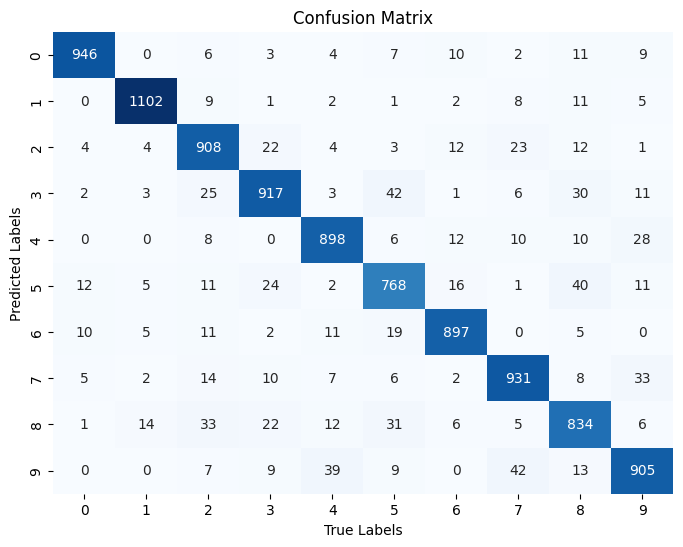

In [63]:
num_classes = max(np.max(predictions_test), np.max(y_test)) + 1
conf_matrix = np.zeros((num_classes, num_classes), dtype=int)

y_test_argmax = np.argmax(y_test, axis=1)

for i in range(len(y_test_argmax)):
    conf_matrix[predictions_test[i], y_test_argmax[i]] += 1

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('True Labels')
plt.ylabel('Predicted Labels')
plt.show()

## **Batch Sizes**

<ipython-input-91-802021c096d6>:12: RuntimeWarning: divide by zero encountered in log
  cross_entropy_loss = -np.sum(y_true * np.log(y_pred)) / num_samples
<ipython-input-91-802021c096d6>:12: RuntimeWarning: invalid value encountered in multiply
  cross_entropy_loss = -np.sum(y_true * np.log(y_pred)) / num_samples


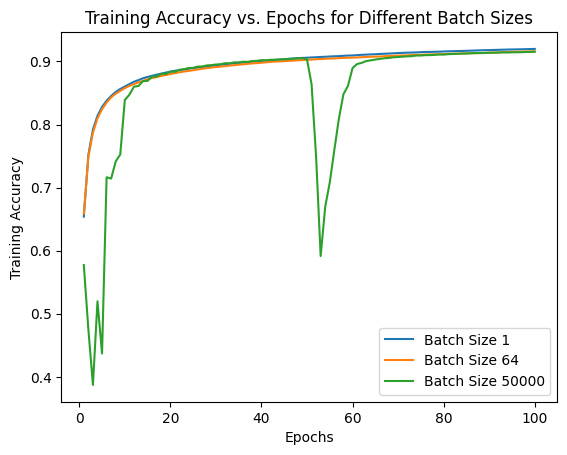

In [ ]:
batch_sizes = [1,64,50000]
epochs = 100
for batch_size in batch_sizes:
    model = LogisticRegression(input_size=X_train.shape[1], output_size=10)
    accuracies = model.train(X_train, y_train, learning_rate=5e-4, reg_coeff=1e-4, epochs=epochs, batch_size=batch_size)

    plt.plot(range(1, epochs + 1), accuracies, label=f'Batch Size {batch_size}')


plt.title('Training Accuracy vs. Epochs for Different Batch Sizes')
plt.xlabel('Epochs')
plt.ylabel('Training Accuracy')
plt.legend()
plt.show()

## **Learning rate**

<ipython-input-91-802021c096d6>:12: RuntimeWarning: divide by zero encountered in log
  cross_entropy_loss = -np.sum(y_true * np.log(y_pred)) / num_samples
<ipython-input-91-802021c096d6>:12: RuntimeWarning: invalid value encountered in multiply
  cross_entropy_loss = -np.sum(y_true * np.log(y_pred)) / num_samples


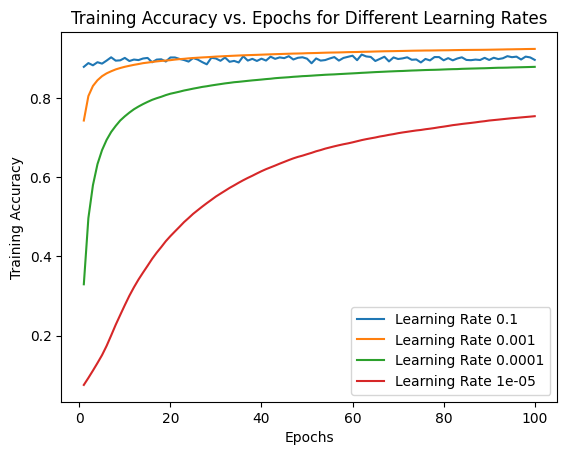

In [ ]:
learning_rates = [0.1,1e-3,1e-4,1e-5]
epochs = 100
for learning_rate in learning_rates:
    model = LogisticRegression(input_size=X_train.shape[1], output_size=10)
    accuracies = model.train(X_train, y_train, learning_rate=learning_rate, reg_coeff=1e-4, epochs=epochs, batch_size=200)

    plt.plot(range(1, epochs + 1), accuracies, label=f'Learning Rate {learning_rate}')


plt.title('Training Accuracy vs. Epochs for Different Learning Rates')
plt.xlabel('Epochs')
plt.ylabel('Training Accuracy')
plt.legend()
plt.show()

## **Weight initialization technique**

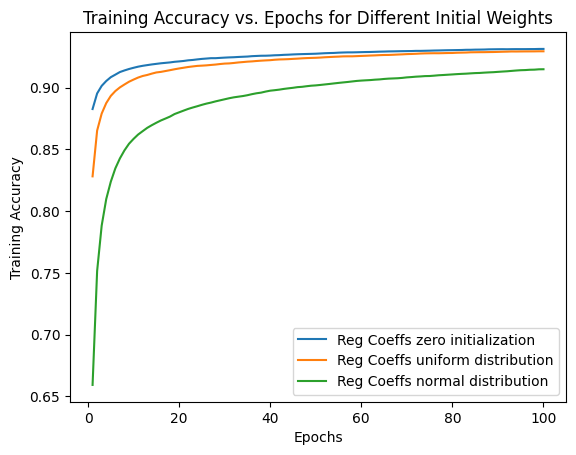

In [ ]:
initial_weights = [np.zeros((X_train.shape[1], 10)),np.random.uniform(0, 1, size=(X_train.shape[1], 10)),np.random.normal(0, 1, size=(X_train.shape[1], 10))]
initial_weights_names = ["zero initialization", "uniform distribution", "normal distribution"]
i = 0
epochs = 100
for initial_weight in initial_weights:
    model = LogisticRegression(input_size=X_train.shape[1], output_size=10, initial_weights=initial_weight)
    accuracies = model.train(X_train, y_train, learning_rate=5e-4, reg_coeff=1e-4, epochs=epochs, batch_size=200)
    plt.plot(range(1, epochs + 1), accuracies, label=f'Reg Coeffs {initial_weights_names[i]}')
    i += 1

plt.title('Training Accuracy vs. Epochs for Different Initial Weights')
plt.xlabel('Epochs')
plt.ylabel('Training Accuracy')
plt.legend()
plt.show()

## **Regularization coefficient**

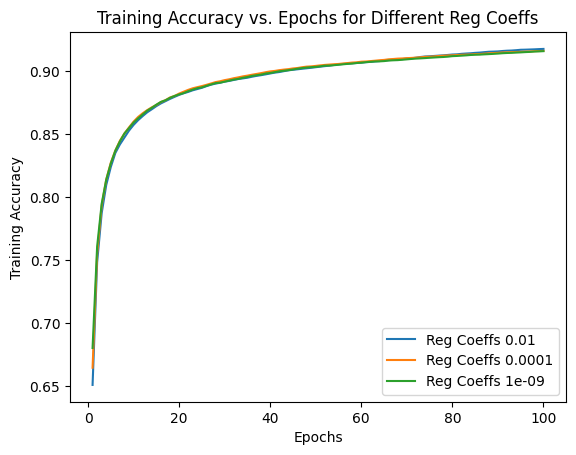

In [ ]:
reg_coeffs = [1e-2,1e-4,1e-9]
epochs = 100
for reg_coeff in reg_coeffs:
    model = LogisticRegression(input_size=X_train.shape[1], output_size=10)
    accuracies = model.train(X_train, y_train, learning_rate=5e-4, reg_coeff=reg_coeff, epochs=epochs, batch_size=200)

    plt.plot(range(1, epochs + 1), accuracies, label=f'Reg Coeffs {reg_coeff}')


plt.title('Training Accuracy vs. Epochs for Different Reg Coeffs')
plt.xlabel('Epochs')
plt.ylabel('Training Accuracy')
plt.legend()
plt.show()

## **Best values for each of the hyperparameters**

In [49]:
best_model = LogisticRegression(input_size=X_train.shape[1], output_size=10, initial_weights=np.zeros((X_train.shape[1], 10)))
best_model.train(X_train, y_train, learning_rate=1e-3, reg_coeff=1e-9, epochs=100, batch_size=64)

[0.89285,
 0.90325,
 0.9092666666666667,
 0.9126166666666666,
 0.9146333333333333,
 0.9162333333333333,
 0.91765,
 0.9184166666666667,
 0.9195666666666666,
 0.9203666666666667,
 0.9209833333333334,
 0.92175,
 0.92225,
 0.9226,
 0.9231166666666667,
 0.9237166666666666,
 0.924,
 0.9246666666666666,
 0.9248333333333333,
 0.9250333333333334,
 0.92525,
 0.9255,
 0.9257833333333333,
 0.9262666666666667,
 0.92635,
 0.9264666666666667,
 0.9266333333333333,
 0.927,
 0.9272833333333333,
 0.9275833333333333,
 0.9278,
 0.92805,
 0.9281333333333334,
 0.9284,
 0.9284666666666667,
 0.92875,
 0.9288166666666666,
 0.9289166666666666,
 0.9292,
 0.9292333333333334,
 0.9293166666666667,
 0.92945,
 0.9295666666666667,
 0.9297833333333333,
 0.92985,
 0.9299333333333333,
 0.93005,
 0.9301666666666667,
 0.9303166666666667,
 0.9302833333333334,
 0.93045,
 0.9305333333333333,
 0.9306,
 0.9306666666666666,
 0.9308,
 0.9309,
 0.93095,
 0.9310166666666667,
 0.9311,
 0.9311833333333334,
 0.9311833333333334,
 0.9312

In [69]:
def predict(model, X):
    logits = np.dot(X, model.weights) + model.bias
    probabilities = model.softmax(logits)
    predictions = np.argmax(probabilities, axis=1)
    return predictions

predictions_test = predict(best_model, X_test)
accuracy_test = np.mean(predictions_test == np.argmax(y_test, axis=1))

print(f"Test Accuracy: {accuracy_test:.2%}")


Test Accuracy: 92.48%


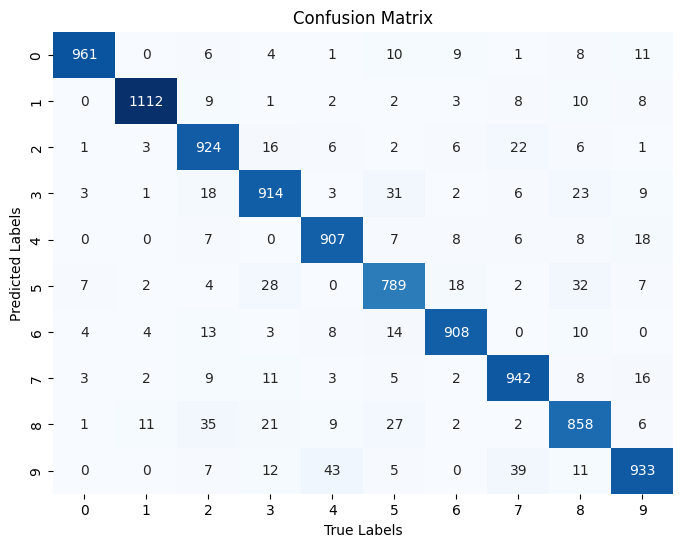

In [70]:
num_classes = max(np.max(predictions_test), np.max(y_test)) + 1
conf_matrix = np.zeros((num_classes, num_classes), dtype=int)

y_test_argmax = np.argmax(y_test, axis=1)

for i in range(len(y_test_argmax)):
    conf_matrix[predictions_test[i], y_test_argmax[i]] += 1

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('True Labels')
plt.ylabel('Predicted Labels')
plt.show()

In [71]:
non_reshaped_weights = best_model.weights

In [94]:
best_model.weights.shape

(784, 10)

In [72]:
weight = non_reshaped_weights.reshape((28, 28, 10))

In [87]:
weight.shape

(28, 28, 10)

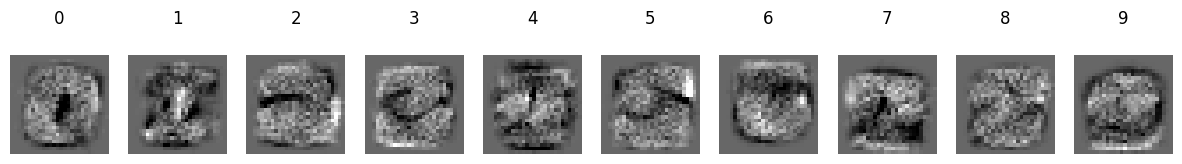

In [98]:
fig, axs = plt.subplots(1, 10, figsize=(15, 3))
for i in range(10):
    axs[i].matshow(weight[:, :, i], cmap=plt.cm.gray, vmin=0.5 * weight.min(), vmax=0.5 * weight.max())
    axs[i].set_title(f'{i}')
    axs[i].axis('off')

plt.show()

In [77]:
def calculate_metrics(y_true, y_pred):
    num_classes = 10
    if len(y_true.shape) == 1:
        y_true_one_hot = np.eye(num_classes, dtype=int)[y_true]
    else:
        y_true_one_hot = y_true

    if len(y_pred.shape) == 1:
        y_pred_one_hot = np.eye(num_classes, dtype=int)[y_pred]
    else:
        y_pred_one_hot = y_pred

    precision_scores = np.zeros(num_classes)
    recall_scores = np.zeros(num_classes)
    f1_scores = np.zeros(num_classes)
    f2_scores = np.zeros(num_classes)

    for class_label in range(num_classes):
        true_positives = np.sum((y_true_one_hot[:, class_label] == 1) & (y_pred_one_hot[:, class_label] == 1))
        false_positives = np.sum((y_true_one_hot[:, class_label] == 0) & (y_pred_one_hot[:, class_label] == 1))
        false_negatives = np.sum((y_true_one_hot[:, class_label] == 1) & (y_pred_one_hot[:, class_label] == 0))

        precision = true_positives / (true_positives + false_positives) if (true_positives + false_positives) != 0 else 0
        recall = true_positives / (true_positives + false_negatives) if (true_positives + false_negatives) != 0 else 0
        f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) != 0 else 0
        f2 = 5 * (precision * recall) / (4 * precision + recall) if (4 * precision + recall) != 0 else 0

        precision_scores[class_label] = precision
        recall_scores[class_label] = recall
        f1_scores[class_label] = f1
        f2_scores[class_label] = f2

    return precision_scores, recall_scores, f1_scores, f2_scores

precision_scores, recall_scores, f1_scores, f2_scores = calculate_metrics(y_test, predictions_test)

for class_label in range(10):
    print(f"Class {class_label}:")
    print(f"  Precision: {precision_scores[class_label]:.4f}")
    print(f"  Recall: {recall_scores[class_label]:.4f}")
    print(f"  F1 Score: {f1_scores[class_label]:.4f}")
    print(f"  F2 Score: {f2_scores[class_label]:.4f}")
    print()


Class 0:
  Precision: 0.9505
  Recall: 0.9806
  F1 Score: 0.9653
  F2 Score: 0.9744

Class 1:
  Precision: 0.9628
  Recall: 0.9797
  F1 Score: 0.9712
  F2 Score: 0.9763

Class 2:
  Precision: 0.9362
  Recall: 0.8953
  F1 Score: 0.9153
  F2 Score: 0.9032

Class 3:
  Precision: 0.9050
  Recall: 0.9050
  F1 Score: 0.9050
  F2 Score: 0.9050

Class 4:
  Precision: 0.9438
  Recall: 0.9236
  F1 Score: 0.9336
  F2 Score: 0.9276

Class 5:
  Precision: 0.8875
  Recall: 0.8845
  F1 Score: 0.8860
  F2 Score: 0.8851

Class 6:
  Precision: 0.9419
  Recall: 0.9478
  F1 Score: 0.9448
  F2 Score: 0.9466

Class 7:
  Precision: 0.9411
  Recall: 0.9163
  F1 Score: 0.9285
  F2 Score: 0.9212

Class 8:
  Precision: 0.8827
  Recall: 0.8809
  F1 Score: 0.8818
  F2 Score: 0.8813

Class 9:
  Precision: 0.8886
  Recall: 0.9247
  F1 Score: 0.9063
  F2 Score: 0.9172

